In [69]:
import pandas as pd
import jieba as jb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
# 1、获取数据
excel = '../src/gastric.xlsx'
# 使用pandas读取excel数据，需要指定engine为openpyxl（需先要下载openpyxl）
file_txt = pd.read_excel(excel, engine="openpyxl")  #[250 rows x 2 columns]
# * 配置GPU
# 打印tensorflow版本信息  # 2.10.0   2.10.0
print(tf.__version__, tf.keras.__version__)
# 获取gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
# 允许gpu内存增长（我只有一个GPU,多个GPU使用循环配置）
tf.config.experimental.set_memory_growth(gpus[0], True)

2.10.0 2.10.0


In [71]:
file_txt.head()

,Label,Text
0,1,（胃体小弯活检）\n粘膜慢性活动性萎缩性炎伴腺体中度肠化及糜烂，局灶腺体粘液样变及低级别上皮...
1,1,（胃窦小弯）粘膜慢性活动性炎伴少量出血，另见少量炎性渗出，局灶腺体低级别上皮内瘤变。\n幽门...
2,1,慢性轻度萎缩性胃（窦小弯）炎伴腺体轻度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。\n幽门螺旋...
3,1,1、（胃窦小弯活检）粘膜慢性活动性炎伴浅表糜烂。\n2、（胃体后壁活检）黏膜慢性炎伴局灶呈息...
4,1,1、（胃角活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂，局灶腺体低级别上皮内瘤变。\n2、（胃...


In [72]:
#   1.2、划分训练集和测试集（按照Label采用分层抽样，保证训练集和测试集样本均匀）
file_txt_train, file_txt_test = train_test_split(file_txt, test_size=0.2, stratify=file_txt['Label'])

In [73]:
# 2、对text文本进行预处理
#   2.1、加载停用词
with open('../src/stop_words.txt', 'r',
          encoding="utf-8") as f:
    stop_words = list(l.strip() for l in f.readlines())
stop_words.extend(['\n', '（', '）', ' '])  # 由于停用词中没有'\n'和中文的左右括号和空格，所以单独再加上去
#   2.2、对训练集和测试集分词，并去除停用词
file_txt_train['Pre_Text'] = file_txt_train['Text'].apply(
    lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stop_words]))
file_txt_test['Pre_Text'] = file_txt_test['Text'].apply(
    lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stop_words]))

In [74]:
file_txt_train.head()

,Label,Text,Pre_Text
129,3,（胃癌根治术标本+吻合口+脾脏+11P组淋巴结+第Ⅰ、Ⅴ组淋巴结）\n 1、肿瘤情况：\n（...,胃癌 根治术 标本 + 吻合 口 + 脾脏 + 11P 组 淋巴结 + Ⅰ Ⅴ 组 淋巴结 ...
58,2,（胃窦小弯）粘膜慢性炎伴局灶腺体高级别上皮内瘤变，腺癌不能排除。\n（建议必要时重新取材送检！）,胃窦 小弯 粘膜 慢性 炎伴 局灶 腺体 高级别 上皮 内瘤 变 腺癌 不能 排除 建议 必...
28,1,1.（食管下段）受检鳞状上皮略增生，另见少量胃粘膜慢性炎伴出血。\n2.（胃窦小弯）粘膜慢性...,. 食管 段 受检 鳞状 上皮 略 增生 另见 少量 胃粘膜 慢性 炎伴 出血 . 胃窦 小...
180,4,（胃体小弯活检）中分化腺癌。,胃体 弯 活检 中 分化腺癌
167,4,1.（胃幽门前区前壁活检）慢性活动性萎缩性胃炎伴浅表糜烂。\n2.（胃贲门胃体活检）中分化腺...,. 胃 幽门 前区 前壁 活检 慢性 活动性 萎缩性 胃炎 伴 浅表 糜烂 . 胃 贲门 胃...


In [75]:
file_txt_test.head()

,Label,Text,Pre_Text
136,3,（全胃切除标本+切缘+食管下段）\n 1、肿瘤情况：\n（1）组织学分型与分级：胃体后壁隆起...,全胃 切除 标本 + 切缘 + 食管 段 肿瘤 情况 组织 学分 型 分级 胃体 后壁 隆起...
41,1,（胃角小弯活检）\n粘膜慢性活动性炎伴局灶腺体轻度肠化及浅表糜烂、炎性渗出，\n局灶腺体低级...,胃角 弯 活检 粘膜 慢性 活动性 炎伴 局灶 腺体 轻度 肠化 浅表 糜烂 炎性 渗出 局...
191,4,（胃角活检）低分化腺癌。\n\n幽门螺杆菌（HP）：（阳性，+）。,胃角 活检 低 分化腺癌 幽门 螺杆菌 HP 阳性 +
182,4,（胃窦活检）低分化腺癌。（建议免疫组化标记，以明确HER-2状态！）,胃窦 活检 低 分化腺癌 建议 免疫组化 标记 明确 HER - 状态
204,5,（胃角小弯活检）低分化腺癌，部分为印戒细胞癌。（建议行HER-2基因检测！）,胃角 弯 活检 低 分化腺癌 部分 印戒 细胞 癌 建议 行 HER - 基因 检测


In [76]:
#   2.3、对训练集切词后的词语进行对整数的映射
#       * 先从训练集中找到最长句子的词长度
max_length = max([len(s.split(' ')) for s in file_txt_train['Pre_Text']])
print(max_length)  # max_length会随着训练集的不同而改变


#       * 获取分词器（只是用它做标记化处理）
def create_tokenizer(lines):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')  # 多加一个未知词
    tokenizer.fit_on_texts(lines)
    return tokenizer


tokenizer = create_tokenizer(file_txt_train['Pre_Text'])


#       * 使用tokenizer.text_to_sequences()函数来获取词语-整数编码
#       * 使用pad_sequences函数来为长度不够的文本进行填0操作，使所有文本长度一致
#       * 进行词语-整数映射
def encode_docs(tokenizer, max_length, docs):
    encoded = tokenizer.texts_to_sequences(docs)  #词语-整数映射
    padded = tf.keras.utils.pad_sequences(encoded, maxlen=max_length, padding='post')  # 在结尾处补0
    return padded


#       * 转化为对应特征值和目标值的张量
X_train = tf.constant(encode_docs(tokenizer, max_length, file_txt_train['Pre_Text'].tolist()))
X_test = tf.constant(encode_docs(tokenizer, max_length, file_txt_test['Pre_Text'].tolist()))
y_train = tf.constant(file_txt_train['Label'])
y_test = tf.constant(file_txt_test['Label'])
#       * 注意：5分类  不指定num_class时，num_class的默认值是标签中最大数+1
Y_train = tf.constant(tf.keras.utils.to_categorical(y_train))
Y_test = tf.constant(tf.keras.utils.to_categorical(y_test))

205


In [77]:
# x_train.shape,y_train.shape,x_test.shape,y_test.shape
Y_train

<tf.Tensor: shape=(200, 6), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [78]:
# 3、构建神经网络模型
#   获取输入维度，即词典数
input_dim = len(tokenizer.word_index)


#   构建模型
def define_model(input_dim, max_length):
    model = tf.keras.Sequential()
    # 构建一个嵌入层
    model.add(tf.keras.layers.Embedding(input_dim=input_dim, output_dim=128, input_length=max_length))
    # 构建一组卷积层、池化层和Dropout层
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation=tf.nn.relu, padding="same"))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    # 再构建一组卷积层、池化层和Dropout层
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation=tf.nn.relu, padding="same"))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    # 添加flatten层，转为一维张量
    model.add(tf.keras.layers.Flatten())
    # 添加两组全连接层
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))
    # 配置训练方法
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [79]:
# 4、进行模型训练
def model_train(x_train, y_train):
    model = define_model(input_dim, max_length)
    # 训练，并获取训练的日志
    history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2,
                        shuffle=True)  # 再次划分0.2为验证集，不参与模型构建
    # 保存模型
    model.save('temp_word_train.h5')
    return history


history = model_train(X_train, Y_train)  # 获取日志

Epoch 1/100
5/5 [==============================] - 1s 80ms/step - loss: 1.7497 - accuracy: 0.2500 - val_loss: 1.6959 - val_accuracy: 0.2250
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 1.6179 - accuracy: 0.2688 - val_loss: 1.5755 - val_accuracy: 0.3500
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 1.4631 - accuracy: 0.4250 - val_loss: 1.4286 - val_accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 1.3323 - accuracy: 0.4938 - val_loss: 1.3262 - val_accuracy: 0.4250
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 1.2869 - accuracy: 0.4750 - val_loss: 1.2860 - val_accuracy: 0.4750
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 1.1935 - accuracy: 0.4875 - val_loss: 1.2509 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 1.1398 - accuracy: 0.5312 - val_loss: 1.1307 - val_accuracy: 0.5000
Epoch 8/100
5/5 [===

In [80]:
# 6、加载模型进行预测
#   6.1、加载模型
# temp_model = tf.keras.models.load_model("./验证集0.90准确率的模型.h5")
temp_model = tf.keras.models.load_model("./temp_word_train.h5")

In [81]:
#   6.2、查看模型信息
temp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 205, 128)          60800     
                                                                 
 conv1d_8 (Conv1D)           (None, 205, 32)           12320     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 51, 32)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 51, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 51, 64)            6208      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 12, 64)           0         
 1D)                                                  

In [82]:
# 7、评估模型
#   使用测试集来评估模型的准确率
evaluate = temp_model.evaluate(X_test, Y_test, verbose=2)
print(evaluate)
#   * 查看测试集中没有预测中的数据集
pre_label = tf.argmax(temp_model.predict(X_test[:]), axis=1)
result = pd.DataFrame({"真实标签": y_test, "预测标签": pre_label})
result[result["真实标签"] != result["预测标签"]]

2/2 - 0s - loss: 0.4184 - accuracy: 0.9000 - 176ms/epoch - 88ms/step
[0.41840487718582153, 0.8999999761581421]
2/2 [==============================] - 0s 4ms/step


,真实标签,预测标签
3,4,5
8,4,5
9,1,2
20,4,2
46,4,5


In [83]:
history.history

{'loss': [1.7496980428695679,
  1.6178772449493408,
  1.4630731344223022,
  1.332340955734253,
  1.286930799484253,
  1.1935030221939087,
  1.1397677659988403,
  1.0881973505020142,
  0.9972160458564758,
  0.9181941747665405,
  0.8705687522888184,
  0.8048779368400574,
  0.7366536855697632,
  0.7049045562744141,
  0.5772396326065063,
  0.5552831292152405,
  0.47691088914871216,
  0.42367491126060486,
  0.37109044194221497,
  0.33449700474739075,
  0.28525882959365845,
  0.26644769310951233,
  0.2431047409772873,
  0.22139695286750793,
  0.2099766731262207,
  0.20789703726768494,
  0.19615554809570312,
  0.1884174644947052,
  0.15254183113574982,
  0.14783477783203125,
  0.15791478753089905,
  0.12314963340759277,
  0.14405867457389832,
  0.10585808753967285,
  0.09681445360183716,
  0.0959853008389473,
  0.11467401683330536,
  0.09159351885318756,
  0.10152169317007065,
  0.06770692765712738,
  0.08625642955303192,
  0.08461537957191467,
  0.0901513323187828,
  0.06194990873336792,
  0

In [84]:
# 8、绘制分类图
#   8.1、获取日志信息
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

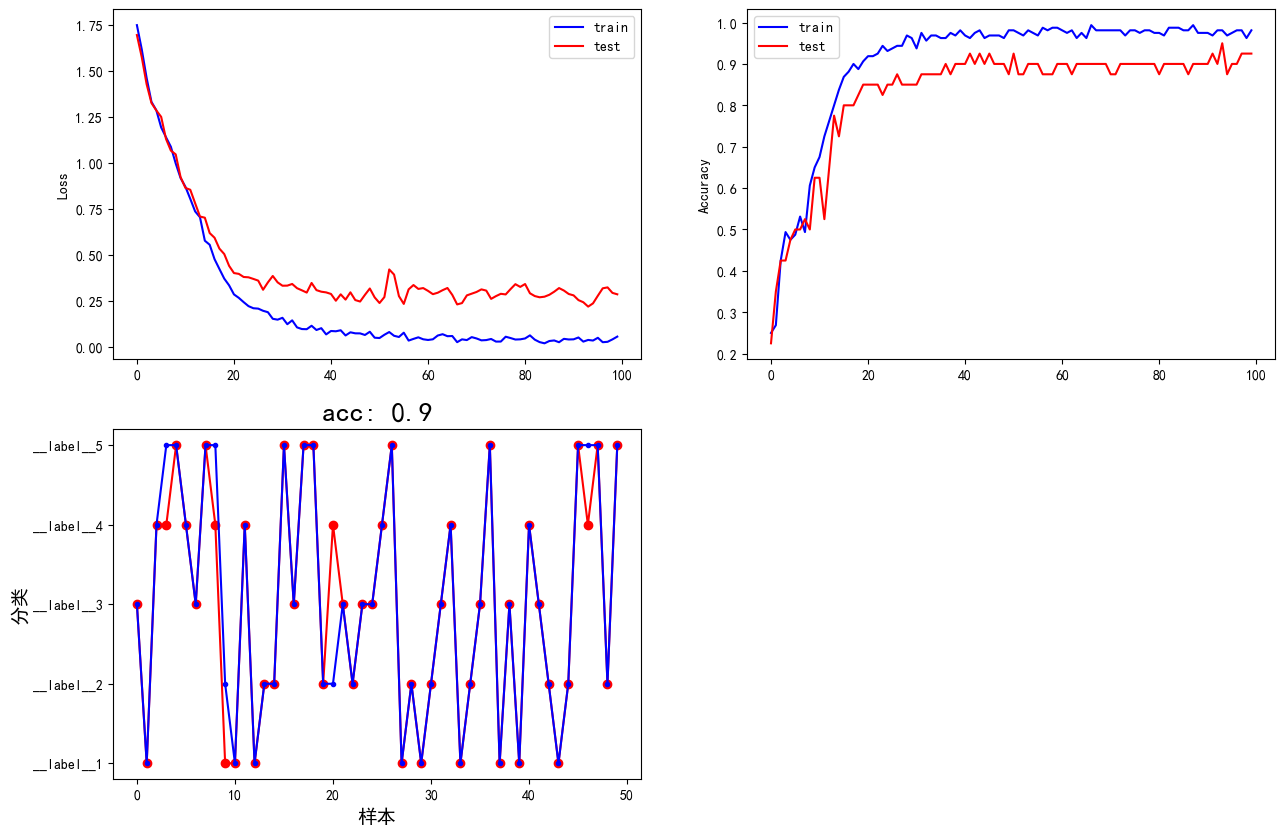

In [85]:
#   8.2、绘制训练和验证集的损失值和迭代伦数、精确率和迭代轮数的图像
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(loss,color="blue",label="train")
plt.plot(val_loss,color="red",label="test")
plt.ylabel("Loss")
plt.legend()

plt.subplot(222)
plt.plot(acc,color="blue",label="train")
plt.plot(val_acc,color="red",label="test")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(223)
scale_ls = range(1,6)
index_ls = ['__label__1','__label__2','__label__3','__label__4','__label__5']
plt.yticks(scale_ls,index_ls) ## 可以设置坐标字
plt.title(f"acc: {round(evaluate[1],2)}", fontsize=20)
plt.plot(result["真实标签"].tolist(), color="red", marker='o', label="真实分类")
plt.plot(result["预测标签"].tolist(), color="blue", marker='.', label="预测分类")
plt.xlabel("样本", fontsize=14)
plt.ylabel("分类", fontsize=14)


plt.show()